## Bioinformatics Project -- Bioactivity Prediction

source: ChEMBL Database

In [14]:
pip install rdkit -pypi


Usage:   
  /Users/tk/opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/tk/opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/tk/opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/tk/opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/tk/opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: -p
Note: you may need to restart the kernel to use updated packages.


In [39]:
def smil_to_maccfp(smile):

    """
    convert smiles to Molecular ACCess System (MACCS) fingerprints

    parameters:
    --------------
    smile: str
           smile of the molecule
    Returns:
    -----------
    nparray
          macc fingerprint of the molecule in form of list

    """
    # construct the molecule from smile
    mole = Chem.MolFromSmiles(smile)
    # forming MACC fingerprint from the molecue
    macc = MACCSkeys.GenMACCSKeys(mole)
    # convert MACC fp to array
    bitlist = np.asarray(macc)
    return(bitlist)

In [37]:
from rdkit import Chem
import numpy as np
from rdkit.Chem import MACCSkeys, Draw
def smil_to_maccfp(df):

    """
    convert smiles to Molecular ACCess System (MACCS) fingerprints

    parameters:
    --------------
    smile: str
           smile of the molecule
    Returns:
    -----------
    nparray
          macc fingerprint of the molecule in form of list

    """
    smil = df['canonical_smiles']

    # construct the molecule from smile
    mole = Chem.MolFromSmiles(smile)
    # forming MACC fingerprint from the molecue
    macc = MACCSkeys.GenMACCSKeys(mole)
    # convert MACC fp to array
    bitlist = np.asarray(macc)
#     maccs_test_df = pd.DataFrame([bitlist for smile in smil_test])
    return bitlist



In [40]:
test = pd.read_csv('EGFR_test_set.csv')

In [41]:
smil_test = test['canonical_smiles']

In [42]:
maccs_test_df = pd.DataFrame([smil_to_maccfp(smile) for smile in smil_test])

In [98]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [99]:
def build_model(input_data):
    # Reads in saved regression model
#     load_model = pickle.load(open('acetylcholinesterase_model.pkl', 'rb'))
    # Apply model to make predictions
    model = load_model('NN_bioactivity_model.hdf5 ')
    predicted_pic50 = model.predict(input_data)
    predicted_pic50 = predicted_pic50.reshape(1, predicted_pic50.shape[0])
#     prediction = load_model.predict(input_data)
    st.header('**Prediction output**')
    prediction_output = pd.Series(predicted_pic50, name='pIC50')
    molecule_name = pd.Series(load_data[1], name='molecule_name')
    df = pd.concat([molecule_name, prediction_output], axis=1)
    return df

In [100]:
model = load_model('NN_bioactivity_model.hdf5 ')

In [93]:
predicted_pic50 = model.predict(maccs_test_df)

In [89]:
predicted_pic50 = predicted_pic50.ravel()

In [90]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14357,Not Active,20103556,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4509084,EGFR kinase inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,20.0
14358,None,20124310,[],CHEMBL4510669,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,4.59
14359,None,20143388,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512213,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0
14360,None,20143750,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512500,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [79]:
load_data = pd.read_csv('EGFR_test_set.csv')

In [84]:

pd.Series(load_data['canonical_smiles'], name='molecule')

0     S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1
1          S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1
2               Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1
3     O=C(/C=C/CN1CC[NH+](C)CC1)N1Cc2sc3ncnc(N[C@H](...
4     S(=O)(=O)(NC(=O)Cn1c(C)ncc1[N+](=O)[O-])c1ccc(...
5           S=C(N/N=C(/C=C/c1c2c(ccc1)cccc2)\c1ccccc1)N
6     Fc1c(Nc2n([C@@H]3COCC3)c3nc(NC4CCC(O)CC4)ncc3n...
7     O=C([O-])[C@H](N=C1C(=O)C(C/C=C(/CC[C@]2(C)C(=...
8     O(CC)c1c(OCC)cc2ncnc(C#Cc3c(-c4ccccc4)cc[nH]3)...
9                       Brc1cc(Nc2ncnc3nc(NC)ccc23)ccc1
10    S(=O)(=O)(Oc1ccc(C(=O)C(C[NH+](C)C)=C)cc1)c1cc...
11            O(C)c1c(OC)ccc(N(C)c2nc(C)nc3oc(C)cc23)c1
12    F[C@H]1[C@@H](OC)CCN(c2nc(Nc3ncc4nc(C)n(C(C)C)...
13         FC(F)(F)Oc1c(NC(=O)Nc2sccn2)cc(-c2cnccc2)cc1
14    O(C[C@H]1OCC[NH2+]C1)Cc1c2C(Nc3cc4c(n([C@H](C)...
15            Clc1ccc(-c2oc(Cc3[nH]c4c(n3)cccc4)nn2)cc1
16    O=C(OCC)C1=C(c2ccc(O)cc2)C(=O)c2c([O-])cc(O)cc2O1
17    O(C)c1cc([O-])c2C(=O)C=3[C@H](O)[C@@H](O)[

In [1]:
#ChEMBL web service package installation to retrieve data 
! pip install chembl_webresource_client

     |████████████████████████████████| 51 kB 829 kB/s eta 0:00:01
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.4-py3-none-any.whl size=55640 sha256=41530f831b76aefed41f3fa6e65d9d82d237741897a23c3067589d391ae6a976
  Stored in directory: /Users/tk/Library/Caches/pip/wheels/21/24/ea/3f521facd12e747d66b872de2271161ba2aec11c8da3ab2214
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=e51fde87a80327d3f6066eb8f35030f054cf1ee10d5f69ed3bcae0f109935854
  Stored in directory: /Users/tk/Library/Caches/pip/wheels/d3/e0/e9/305e348717e399665119bd012510d51ff4f22d709ff60c3096
Successfully built chembl-webresource-client easydict


## Import libraries

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search target enzyme

In [3]:
target = new_client.target
target_query = target.search('EGFR') 
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,9.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,7.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Epidermal growth factor receptor,4.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


In [4]:
#SSRI targets serotonin transporters resulting in an inhibition of 5-HT 
#reuptake in the presynapse from the synaptic cleft.
selected_target = targets.target_chembl_id[3] #Homo Sapiens
selected_target

'CHEMBL203'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")


In [6]:
df = pd.DataFrame.from_dict(res)

In [15]:
df.to_csv('serotonin_transporter_bioactivity_data_raw.csv', index=False)

## Data Preprocessing (NA values are dropped)

In [20]:
#Detect existing (non-missing) values.
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()] 


In [22]:
#Drop redundant data points
df = df.drop_duplicates(['canonical_smiles'])

## Select molecule_chembl_id, canonical_smiles, standard_value and bioactivity_class into a DataFrame


In [23]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_selected = df[selection]
df_selected

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL322923,COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1C2,5160.0
1,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,1.15
2,CHEMBL311347,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C,4.2
3,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,33.4
4,CHEMBL87031,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,27.6
...,...,...,...
4359,CHEMBL4472139,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...,10000.0
4360,CHEMBL4455798,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1,10000.0
4361,CHEMBL4441014,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1,10000.0
4362,CHEMBL4530231,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ccccn3)CC2)cc1,10000.0


In [24]:
df_selected.to_csv('serotonin_transporter_bioactivity_data_preprocessed.csv', index=False)

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [25]:
#Labeling bioactivity classes according to IC50 values
bioactivity_threshold = []
for i in df_selected.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [38]:
def labeling(standard_value):
    if float(standard_value) >= 10000:
        return 'inactive'
    elif float(standard_value) <= 1000:
        return 'active'
    else:
        return 'intermediate'

In [31]:
len(bioactivity_threshold)

2906

In [32]:
len(df_selected)

2906

In [42]:
#Appending bioactivity class to dataframe
df_selected['class'] = df_selected.standard_value.apply(labeling)

<ipython-input-42-285a7d47d9de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['class'] = df_selected.standard_value.apply(labeling)


In [43]:
df_selected

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL322923,COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1C2,5160.0,intermediate
1,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,1.15,active
2,CHEMBL311347,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C,4.2,active
3,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,33.4,active
4,CHEMBL87031,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,27.6,active
...,...,...,...,...
4359,CHEMBL4472139,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...,10000.0,inactive
4360,CHEMBL4455798,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1,10000.0,inactive
4361,CHEMBL4441014,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1,10000.0,inactive
4362,CHEMBL4530231,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ccccn3)CC2)cc1,10000.0,inactive


In [45]:
df_selected.to_csv('serotonin_transporter_bioactivity_data_curated.csv', index=False)

In [47]:
! zip serotonin.zip *.csv

  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: bioactivity_data.csv (deflated 90%)
  adding: bioactivity_preprocessed_data.csv (deflated 80%)
  adding: lending_club.csv/ (stored 0%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 13%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: nba_player_data.csv (deflated 63%)
  adding: player_data.csv (deflated 73%)
  adding: regular_season_advanced.csv (deflated 63%)
  adding: serotonin_transporter_bioactivity_data_curated.csv (deflated 82%)
  adding: serotonin_transporter_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: serotonin_transporter_bioactivity_data_raw.csv (deflated 91%)


In [49]:
! conda install -c rdkit rdkit -y

Solving environment: done

# All requested packages already installed.



In [65]:
df_selected = df_selected.reset_index()

In [70]:
df_selected = df_selected.drop(columns='index')

In [78]:
df_no_smiles = df_selected.drop(columns='canonical_smiles')

In [72]:
smiles = []

for i in df_selected.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [79]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles


,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL322923,5160.0,intermediate,COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1C2
1,CHEMBL435341,1.15,active,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1
2,CHEMBL311347,4.2,active,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C
3,CHEMBL100941,33.4,active,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1
4,CHEMBL87031,27.6,active,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C
...,...,...,...,...
2901,CHEMBL4472139,10000.0,inactive,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...
2902,CHEMBL4455798,10000.0,inactive,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1
2903,CHEMBL4441014,10000.0,inactive,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1
2904,CHEMBL4530231,10000.0,inactive,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ccccn3)CC2)cc1


## Calculate Lipinski descriptors

The Lipinski's Rule of 5:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [74]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

RDKit WARNING: [00:14:13] Enabling RDKit 2019.09.3 jupyter extensions


## Calculate Descriptors

In [75]:
#takes in smiles (Simplified molecular-input line-entry system) to calculate "MW","LogP","NumHDonors","NumHAcceptors"

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol) #Molecular Weight
        desc_MolLogP = Descriptors.MolLogP(mol) #logP
        desc_NumHDonors = Lipinski.NumHDonors(mol) #Number of Hydrogen donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #Number of Hydrogen acceptors
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [80]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.208,4.7400,0.0,2.0
1,299.414,3.4590,0.0,3.0
2,385.245,3.0305,0.0,3.0
3,313.224,4.6862,0.0,2.0
4,328.239,3.7327,0.0,3.0
...,...,...,...,...
2901,458.997,4.3289,0.0,6.0
2902,454.578,3.6841,0.0,7.0
2903,426.528,2.4655,0.0,8.0
2904,425.540,3.0705,0.0,7.0


In [82]:
#Add Lipinski calculation to the original dataframe
df_combined = pd.concat([df_selected,df_lipinski], axis=1)

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10$^{-9}$
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

## IC50 to pIC50 Conversion

In [90]:
df_combined.standard_value = df_combined.standard_value.astype('float')

In [119]:
import numpy as np
#Normalization of standard_value
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [120]:
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [127]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL322923,COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1C2,intermediate,311.208,4.7400,0.0,2.0,5160.00
1,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,active,299.414,3.4590,0.0,3.0,1.15
2,CHEMBL311347,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C,active,385.245,3.0305,0.0,3.0,4.20
3,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,active,313.224,4.6862,0.0,2.0,33.40
4,CHEMBL87031,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,active,328.239,3.7327,0.0,3.0,27.60
...,...,...,...,...,...,...,...,...
2901,CHEMBL4472139,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...,inactive,458.997,4.3289,0.0,6.0,10000.00
2902,CHEMBL4455798,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1,inactive,454.578,3.6841,0.0,7.0,10000.00
2903,CHEMBL4441014,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1,inactive,426.528,2.4655,0.0,8.0,10000.00
2904,CHEMBL4530231,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ccccn3)CC2)cc1,inactive,425.540,3.0705,0.0,7.0,10000.00


In [128]:
df_norm.loc[df_norm.standard_value_norm == 0]

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
1839,CHEMBL1762471,CNCC[C@@H](Oc1cc(Cl)ccc1Cl)c1ccccc1.O=C(O)/C=C...,active,310.224,4.723,1.0,2.0,0.0


In [151]:
df_norm.iloc[1839].standard_value_norm = 0.00001

/Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [155]:
df_norm = df_norm.drop([1839])

In [156]:
df_norm.standard_value_norm.describe()

count      2905.000000
mean       4040.434884
std       19630.192905
min           0.002000
25%          17.800000
50%         147.000000
75%        1460.000000
max      436100.000000
Name: standard_value_norm, dtype: float64

In [157]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL322923,COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1C2,intermediate,311.208,4.7400,0.0,2.0,5.287350
1,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,active,299.414,3.4590,0.0,3.0,8.939302
2,CHEMBL311347,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C,active,385.245,3.0305,0.0,3.0,8.376751
3,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,active,313.224,4.6862,0.0,2.0,7.476254
4,CHEMBL87031,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,active,328.239,3.7327,0.0,3.0,7.559091
...,...,...,...,...,...,...,...,...
2901,CHEMBL4472139,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...,inactive,458.997,4.3289,0.0,6.0,5.000000
2902,CHEMBL4455798,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1,inactive,454.578,3.6841,0.0,7.0,5.000000
2903,CHEMBL4441014,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1,inactive,426.528,2.4655,0.0,8.0,5.000000
2904,CHEMBL4530231,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ccccn3)CC2)cc1,inactive,425.540,3.0705,0.0,7.0,5.000000


In [158]:
df_final.pIC50.describe()

count    2905.000000
mean        6.758429
std         1.196068
min         3.360414
25%         5.835647
50%         6.832683
75%         7.749580
max        11.698970
Name: pIC50, dtype: float64

In [159]:
df_final.loc[df_final.pIC50.isnull()]

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50


In [ ]:
# df_final.to_csv('serotonin_transporter_bioactivity_pIC50.csv')

## Remove the 'intermediate' bioactivity class

In [160]:
df_final = df_final[df_final['class'] != 'intermediate']
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,active,299.414,3.4590,0.0,3.0,8.939302
2,CHEMBL311347,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C,active,385.245,3.0305,0.0,3.0,8.376751
3,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,active,313.224,4.6862,0.0,2.0,7.476254
4,CHEMBL87031,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,active,328.239,3.7327,0.0,3.0,7.559091
5,CHEMBL316342,COC(=O)C1C2CCC(CC1c1ccc(Cl)c(Cl)c1)O2,active,315.196,3.8175,0.0,3.0,8.187087
...,...,...,...,...,...,...,...,...
2900,CHEMBL4539630,Clc1cccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC...,inactive,493.442,4.9823,0.0,6.0,5.000000
2901,CHEMBL4472139,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...,inactive,458.997,4.3289,0.0,6.0,5.000000
2902,CHEMBL4455798,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1,inactive,454.578,3.6841,0.0,7.0,5.000000
2903,CHEMBL4441014,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1,inactive,426.528,2.4655,0.0,8.0,5.000000


## Exploratory Data Analysis

In [161]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

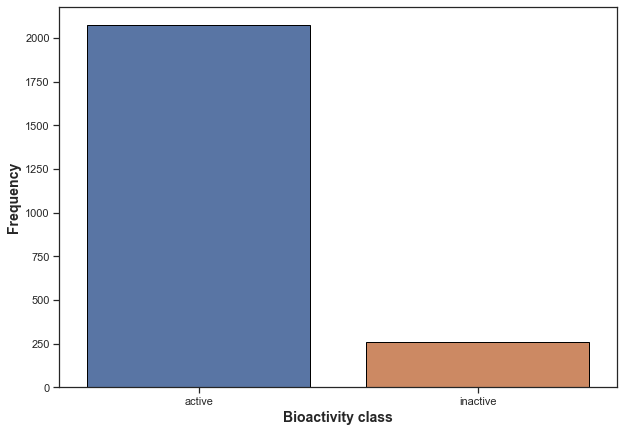

In [162]:
plt.figure(figsize=(10, 7))

sns.countplot(x='class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

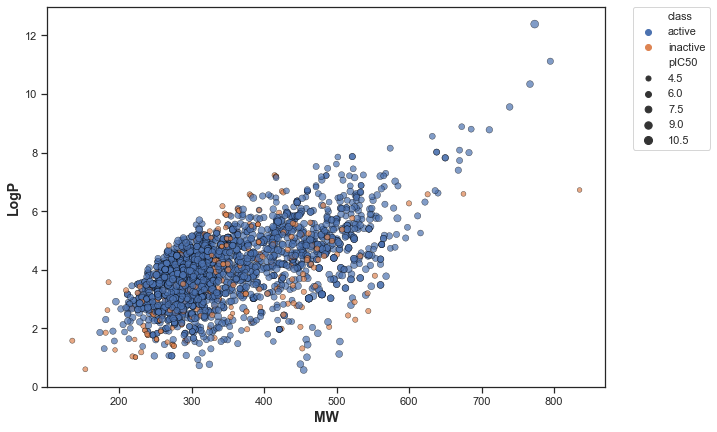

In [163]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

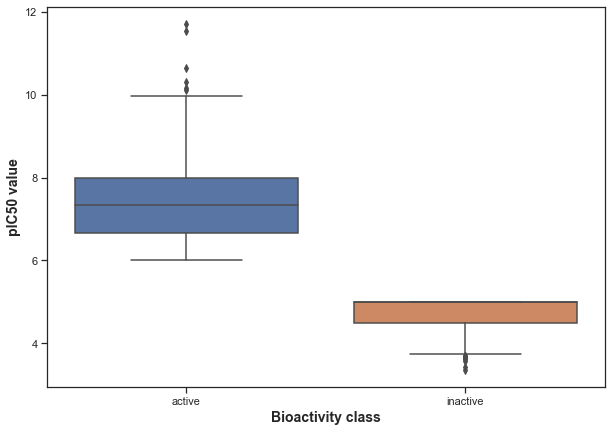

In [164]:
plt.figure(figsize=(10, 7))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

As expected, active compounds have a higher pIC50 value than inactive compounds

Mann-Whitney U Test

In [167]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, verbose=False):


# seed the random number generator
    seed(1)

# actives and inactives
    selection = [descriptor, 'class']
    df = df_final[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_final[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

# compare samples
    stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

In [168]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.560375e-152,0.05,Different distribution (reject H0)


## Molecular Weight comparison

Text(0, 0.5, 'MW')

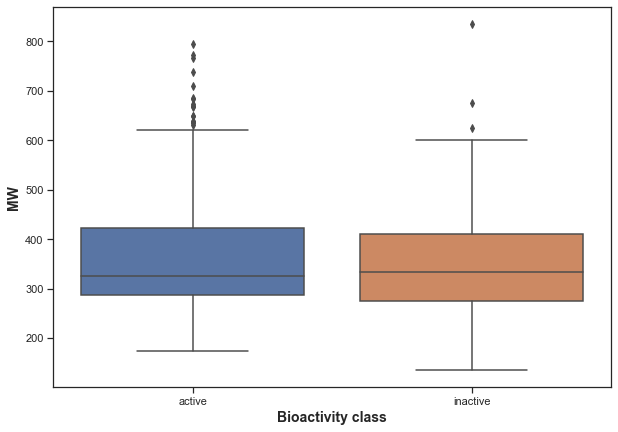

In [169]:
plt.figure(figsize=(10, 7))

sns.boxplot(x = 'class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [177]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,252464.0,0.056045,0.05,Same distribution (fail to reject H0)


## logP comparison

Text(0, 0.5, 'LogP')

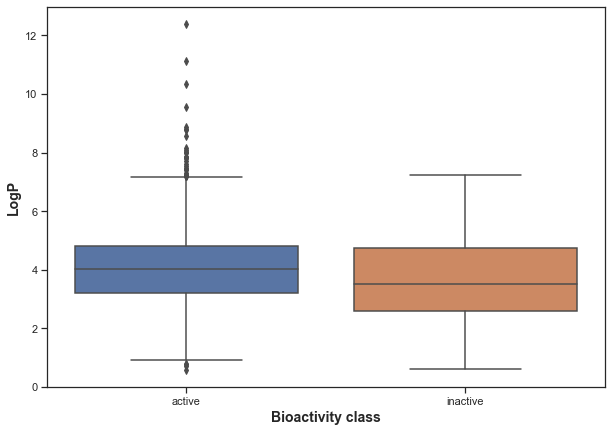

In [171]:
plt.figure(figsize=(10, 7))

sns.boxplot(x = 'class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

In [172]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,226941.0,0.000022,0.05,Different distribution (reject H0)


## Hydrogen Donor Comparison

Text(0, 0.5, 'NumHDonors')

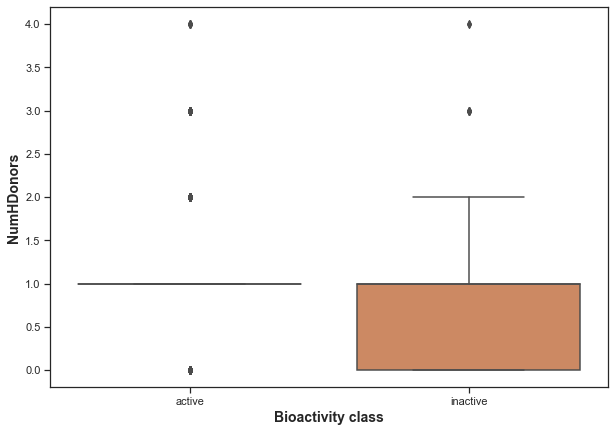

In [173]:
plt.figure(figsize=(10, 7))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')


In [174]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,220987.0,1.279058e-07,0.05,Different distribution (reject H0)


## Hydrogen acceptor comparison

Text(0, 0.5, 'NumHAcceptors')

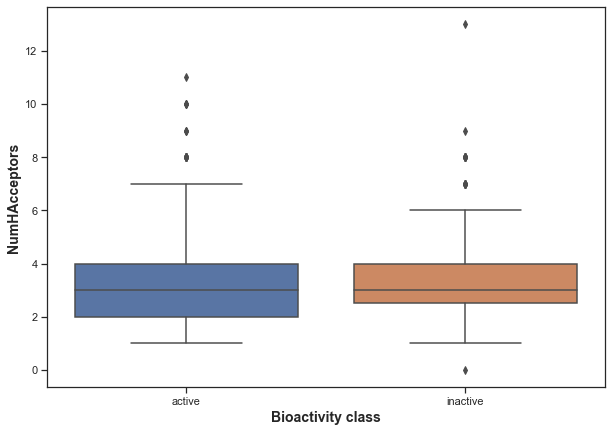

In [175]:
plt.figure(figsize=(10, 7))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [176]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,224580.0,0.000005,0.05,Different distribution (reject H0)


All of the Lipinski's descriptors except molecular weight exhibited statistically significant difference between the actives and inactives.

In [178]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,active,299.414,3.4590,0.0,3.0,8.939302
2,CHEMBL311347,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C,active,385.245,3.0305,0.0,3.0,8.376751
3,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,active,313.224,4.6862,0.0,2.0,7.476254
4,CHEMBL87031,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,active,328.239,3.7327,0.0,3.0,7.559091
5,CHEMBL316342,COC(=O)C1C2CCC(CC1c1ccc(Cl)c(Cl)c1)O2,active,315.196,3.8175,0.0,3.0,8.187087
...,...,...,...,...,...,...,...,...
2900,CHEMBL4539630,Clc1cccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC...,inactive,493.442,4.9823,0.0,6.0,5.000000
2901,CHEMBL4472139,Clc1ccc(N2CCN(CCn3nnnc3C(c3ccccc3)c3ccccc3)CC2...,inactive,458.997,4.3289,0.0,6.0,5.000000
2902,CHEMBL4455798,COc1ccccc1N1CCN(CCn2nnnc2C(c2ccccc2)c2ccccc2)CC1,inactive,454.578,3.6841,0.0,7.0,5.000000
2903,CHEMBL4441014,c1ccc(C(c2ccccc2)c2nnnn2CCN2CCN(c3ncccn3)CC2)cc1,inactive,426.528,2.4655,0.0,8.0,5.000000


In [179]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [180]:
! cat molecule.smi | head -5

C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1	CHEMBL435341
COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2C	CHEMBL311347
COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1	CHEMBL100941
COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C	CHEMBL87031
COC(=O)C1C2CCC(CC1c1ccc(Cl)c(Cl)c1)O2	CHEMBL316342
cat: stdout: Broken pipe


In [182]:
! cat molecule.smi | wc -l

    2334


## Calculate fingerprint descriptors to predict pIC50

In [189]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [191]:
! bash padel.sh

Processing CHEMBL435341 in molecule.smi (1/2334). 
Processing CHEMBL311347 in molecule.smi (2/2334). 
Processing CHEMBL100941 in molecule.smi (3/2334). 
Processing CHEMBL87031 in molecule.smi (4/2334). 
Processing CHEMBL316342 in molecule.smi (5/2334). 
Processing CHEMBL367408 in molecule.smi (6/2334). 
Processing CHEMBL88915 in molecule.smi (7/2334). 
Processing CHEMBL173344 in molecule.smi (8/2334). 
Processing CHEMBL2079586 in molecule.smi (13/2334). Average speed: 4.97 s/mol.
Processing CHEMBL151695 in molecule.smi (18/2334). Average speed: 0.68 s/mol.
Processing CHEMBL370805 in molecule.smi (12/2334). Average speed: 4.97 s/mol.
Processing CHEMBL151420 in molecule.smi (17/2334). Average speed: 0.67 s/mol.
Processing CHEMBL1201203 in molecule.smi (14/2334). Average speed: 4.98 s/mol.
Processing CHEMBL169471 in molecule.smi (10/2334). Average speed: 4.97 s/mol.
Processing CHEMBL353333 in molecule.smi (9/2334). Average speed: 4.97 s/mol.
Processing CHEMBL151894 in molecule.smi (15/233

Processing CHEMBL67387 in molecule.smi (109/2334). Average speed: 0.12 s/mol.
Processing CHEMBL50858 in molecule.smi (110/2334). Average speed: 0.12 s/mol.
Processing CHEMBL894 in molecule.smi (111/2334). Average speed: 0.12 s/mol.
Processing CHEMBL103504 in molecule.smi (112/2334). Average speed: 0.12 s/mol.
Processing CHEMBL101250 in molecule.smi (113/2334). Average speed: 0.12 s/mol.
Processing CHEMBL430840 in molecule.smi (114/2334). Average speed: 0.12 s/mol.
Processing CHEMBL101905 in molecule.smi (115/2334). Average speed: 0.12 s/mol.
Processing CHEMBL321067 in molecule.smi (116/2334). Average speed: 0.12 s/mol.
Processing CHEMBL419728 in molecule.smi (117/2334). Average speed: 0.12 s/mol.
Processing CHEMBL102018 in molecule.smi (118/2334). Average speed: 0.12 s/mol.
Processing CHEMBL89208 in molecule.smi (119/2334). Average speed: 0.12 s/mol.
Processing CHEMBL89476 in molecule.smi (120/2334). Average speed: 0.12 s/mol.
Processing CHEMBL89754 in molecule.smi (121/2334). Average 

Processing CHEMBL186488 in molecule.smi (213/2334). Average speed: 0.08 s/mol.
Processing CHEMBL185169 in molecule.smi (214/2334). Average speed: 0.08 s/mol.
Processing CHEMBL1722 in molecule.smi (215/2334). Average speed: 0.08 s/mol.
Processing CHEMBL2093958 in molecule.smi (216/2334). Average speed: 0.08 s/mol.
Processing CHEMBL534479 in molecule.smi (217/2334). Average speed: 0.08 s/mol.
Processing CHEMBL194372 in molecule.smi (218/2334). Average speed: 0.08 s/mol.
Processing CHEMBL197696 in molecule.smi (219/2334). Average speed: 0.08 s/mol.
Processing CHEMBL11 in molecule.smi (220/2334). Average speed: 0.08 s/mol.
Processing CHEMBL259209 in molecule.smi (221/2334). Average speed: 0.08 s/mol.
Processing CHEMBL198072 in molecule.smi (222/2334). Average speed: 0.08 s/mol.
Processing CHEMBL83617 in molecule.smi (223/2334). Average speed: 0.08 s/mol.
Processing CHEMBL197982 in molecule.smi (224/2334). Average speed: 0.08 s/mol.
Processing CHEMBL198045 in molecule.smi (225/2334). Averag

Processing CHEMBL378073 in molecule.smi (317/2334). Average speed: 0.07 s/mol.
Processing CHEMBL209262 in molecule.smi (318/2334). Average speed: 0.07 s/mol.
Processing CHEMBL210656 in molecule.smi (319/2334). Average speed: 0.07 s/mol.
Processing CHEMBL379181 in molecule.smi (320/2334). Average speed: 0.07 s/mol.
Processing CHEMBL380056 in molecule.smi (321/2334). Average speed: 0.07 s/mol.
Processing CHEMBL211372 in molecule.smi (322/2334). Average speed: 0.07 s/mol.
Processing CHEMBL214209 in molecule.smi (323/2334). Average speed: 0.07 s/mol.
Processing CHEMBL384687 in molecule.smi (325/2334). Average speed: 0.07 s/mol.
Processing CHEMBL209707 in molecule.smi (324/2334). Average speed: 0.07 s/mol.
Processing CHEMBL214003 in molecule.smi (326/2334). Average speed: 0.07 s/mol.
Processing CHEMBL212877 in molecule.smi (327/2334). Average speed: 0.07 s/mol.
Processing CHEMBL534942 in molecule.smi (328/2334). Average speed: 0.07 s/mol.
Processing CHEMBL540107 in molecule.smi (329/2334). 

Processing CHEMBL397392 in molecule.smi (423/2334). Average speed: 0.06 s/mol.
Processing CHEMBL245492 in molecule.smi (424/2334). Average speed: 0.06 s/mol.
Processing CHEMBL247538 in molecule.smi (425/2334). Average speed: 0.06 s/mol.
Processing CHEMBL391143 in molecule.smi (426/2334). Average speed: 0.06 s/mol.
Processing CHEMBL247341 in molecule.smi (427/2334). Average speed: 0.06 s/mol.
Processing CHEMBL247340 in molecule.smi (428/2334). Average speed: 0.06 s/mol.
Processing CHEMBL247733 in molecule.smi (429/2334). Average speed: 0.06 s/mol.
Processing CHEMBL395408 in molecule.smi (430/2334). Average speed: 0.06 s/mol.
Processing CHEMBL245482 in molecule.smi (431/2334). Average speed: 0.06 s/mol.
Processing CHEMBL392016 in molecule.smi (432/2334). Average speed: 0.06 s/mol.
Processing CHEMBL245880 in molecule.smi (433/2334). Average speed: 0.06 s/mol.
Processing CHEMBL391806 in molecule.smi (434/2334). Average speed: 0.06 s/mol.
Processing CHEMBL440230 in molecule.smi (435/2334). 

Processing CHEMBL402851 in molecule.smi (528/2334). Average speed: 0.06 s/mol.
Processing CHEMBL256058 in molecule.smi (529/2334). Average speed: 0.06 s/mol.
Processing CHEMBL257265 in molecule.smi (530/2334). Average speed: 0.06 s/mol.
Processing CHEMBL270642 in molecule.smi (531/2334). Average speed: 0.06 s/mol.
Processing CHEMBL258140 in molecule.smi (533/2334). Average speed: 0.06 s/mol.
Processing CHEMBL404197 in molecule.smi (532/2334). Average speed: 0.06 s/mol.
Processing CHEMBL256227 in molecule.smi (534/2334). Average speed: 0.06 s/mol.
Processing CHEMBL403388 in molecule.smi (535/2334). Average speed: 0.06 s/mol.
Processing CHEMBL272533 in molecule.smi (536/2334). Average speed: 0.06 s/mol.
Processing CHEMBL410832 in molecule.smi (537/2334). Average speed: 0.06 s/mol.
Processing CHEMBL259732 in molecule.smi (538/2334). Average speed: 0.06 s/mol.
Processing CHEMBL260037 in molecule.smi (539/2334). Average speed: 0.06 s/mol.
Processing CHEMBL260036 in molecule.smi (540/2334). 

Processing CHEMBL498482 in molecule.smi (632/2334). Average speed: 0.05 s/mol.
Processing CHEMBL498120 in molecule.smi (633/2334). Average speed: 0.05 s/mol.
Processing CHEMBL498481 in molecule.smi (634/2334). Average speed: 0.05 s/mol.
Processing CHEMBL525532 in molecule.smi (635/2334). Average speed: 0.05 s/mol.
Processing CHEMBL510352 in molecule.smi (636/2334). Average speed: 0.05 s/mol.
Processing CHEMBL465123 in molecule.smi (637/2334). Average speed: 0.05 s/mol.
Processing CHEMBL446084 in molecule.smi (638/2334). Average speed: 0.05 s/mol.
Processing CHEMBL313041 in molecule.smi (639/2334). Average speed: 0.05 s/mol.
Processing CHEMBL480988 in molecule.smi (640/2334). Average speed: 0.05 s/mol.
Processing CHEMBL454507 in molecule.smi (641/2334). Average speed: 0.05 s/mol.
Processing CHEMBL499461 in molecule.smi (642/2334). Average speed: 0.05 s/mol.
Processing CHEMBL461571 in molecule.smi (643/2334). Average speed: 0.05 s/mol.
Processing CHEMBL471211 in molecule.smi (644/2334). 

Processing CHEMBL637 in molecule.smi (736/2334). Average speed: 0.05 s/mol.
Processing CHEMBL448953 in molecule.smi (737/2334). Average speed: 0.05 s/mol.
Processing CHEMBL461095 in molecule.smi (738/2334). Average speed: 0.05 s/mol.
Processing CHEMBL99653 in molecule.smi (739/2334). Average speed: 0.05 s/mol.
Processing CHEMBL316862 in molecule.smi (740/2334). Average speed: 0.05 s/mol.
Processing CHEMBL101899 in molecule.smi (741/2334). Average speed: 0.05 s/mol.
Processing CHEMBL420644 in molecule.smi (742/2334). Average speed: 0.05 s/mol.
Processing CHEMBL101055 in molecule.smi (743/2334). Average speed: 0.05 s/mol.
Processing CHEMBL511347 in molecule.smi (744/2334). Average speed: 0.05 s/mol.
Processing CHEMBL528995 in molecule.smi (745/2334). Average speed: 0.05 s/mol.
Processing CHEMBL592374 in molecule.smi (746/2334). Average speed: 0.05 s/mol.
Processing CHEMBL488638 in molecule.smi (747/2334). Average speed: 0.05 s/mol.
Processing CHEMBL485540 in molecule.smi (748/2334). Aver

Processing CHEMBL504892 in molecule.smi (840/2334). Average speed: 0.05 s/mol.
Processing CHEMBL448897 in molecule.smi (841/2334). Average speed: 0.05 s/mol.
Processing CHEMBL466670 in molecule.smi (842/2334). Average speed: 0.05 s/mol.
Processing CHEMBL509228 in molecule.smi (843/2334). Average speed: 0.05 s/mol.
Processing CHEMBL476954 in molecule.smi (844/2334). Average speed: 0.05 s/mol.
Processing CHEMBL450813 in molecule.smi (845/2334). Average speed: 0.05 s/mol.
Processing CHEMBL477586 in molecule.smi (846/2334). Average speed: 0.05 s/mol.
Processing CHEMBL518580 in molecule.smi (847/2334). Average speed: 0.05 s/mol.
Processing CHEMBL477584 in molecule.smi (848/2334). Average speed: 0.05 s/mol.
Processing CHEMBL477374 in molecule.smi (850/2334). Average speed: 0.05 s/mol.
Processing CHEMBL477580 in molecule.smi (849/2334). Average speed: 0.05 s/mol.
Processing CHEMBL517963 in molecule.smi (851/2334). Average speed: 0.05 s/mol.
Processing CHEMBL476116 in molecule.smi (852/2334). 

Processing CHEMBL454770 in molecule.smi (945/2334). Average speed: 0.05 s/mol.
Processing CHEMBL464422 in molecule.smi (946/2334). Average speed: 0.05 s/mol.
Processing CHEMBL450907 in molecule.smi (947/2334). Average speed: 0.05 s/mol.
Processing CHEMBL463431 in molecule.smi (948/2334). Average speed: 0.05 s/mol.
Processing CHEMBL505431 in molecule.smi (949/2334). Average speed: 0.05 s/mol.
Processing CHEMBL451500 in molecule.smi (950/2334). Average speed: 0.05 s/mol.
Processing CHEMBL473966 in molecule.smi (951/2334). Average speed: 0.05 s/mol.
Processing CHEMBL447825 in molecule.smi (952/2334). Average speed: 0.05 s/mol.
Processing CHEMBL461268 in molecule.smi (953/2334). Average speed: 0.05 s/mol.
Processing CHEMBL451652 in molecule.smi (954/2334). Average speed: 0.05 s/mol.
Processing CHEMBL447750 in molecule.smi (955/2334). Average speed: 0.05 s/mol.
Processing CHEMBL504028 in molecule.smi (956/2334). Average speed: 0.05 s/mol.
Processing CHEMBL456638 in molecule.smi (957/2334). 

Processing CHEMBL579244 in molecule.smi (1050/2334). Average speed: 0.05 s/mol.
Processing CHEMBL575753 in molecule.smi (1051/2334). Average speed: 0.05 s/mol.
Processing CHEMBL566958 in molecule.smi (1052/2334). Average speed: 0.05 s/mol.
Processing CHEMBL584152 in molecule.smi (1053/2334). Average speed: 0.05 s/mol.
Processing CHEMBL576758 in molecule.smi (1054/2334). Average speed: 0.05 s/mol.
Processing CHEMBL576145 in molecule.smi (1055/2334). Average speed: 0.05 s/mol.
Processing CHEMBL574920 in molecule.smi (1056/2334). Average speed: 0.05 s/mol.
Processing CHEMBL582894 in molecule.smi (1057/2334). Average speed: 0.05 s/mol.
Processing CHEMBL577825 in molecule.smi (1059/2334). Average speed: 0.05 s/mol.
Processing CHEMBL566957 in molecule.smi (1058/2334). Average speed: 0.05 s/mol.
Processing CHEMBL578841 in molecule.smi (1060/2334). Average speed: 0.05 s/mol.
Processing CHEMBL576170 in molecule.smi (1061/2334). Average speed: 0.05 s/mol.
Processing CHEMBL577598 in molecule.smi 

Processing CHEMBL566618 in molecule.smi (1153/2334). Average speed: 0.05 s/mol.
Processing CHEMBL599846 in molecule.smi (1154/2334). Average speed: 0.05 s/mol.
Processing CHEMBL592854 in molecule.smi (1155/2334). Average speed: 0.05 s/mol.
Processing CHEMBL596775 in molecule.smi (1156/2334). Average speed: 0.05 s/mol.
Processing CHEMBL578612 in molecule.smi (1157/2334). Average speed: 0.05 s/mol.
Processing CHEMBL566830 in molecule.smi (1158/2334). Average speed: 0.05 s/mol.
Processing CHEMBL599028 in molecule.smi (1159/2334). Average speed: 0.05 s/mol.
Processing CHEMBL599230 in molecule.smi (1160/2334). Average speed: 0.05 s/mol.
Processing CHEMBL589494 in molecule.smi (1161/2334). Average speed: 0.05 s/mol.
Processing CHEMBL580143 in molecule.smi (1162/2334). Average speed: 0.05 s/mol.
Processing CHEMBL599233 in molecule.smi (1163/2334). Average speed: 0.05 s/mol.
Processing CHEMBL565386 in molecule.smi (1164/2334). Average speed: 0.05 s/mol.
Processing CHEMBL567481 in molecule.smi 

Processing CHEMBL1214113 in molecule.smi (1255/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214115 in molecule.smi (1256/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214116 in molecule.smi (1257/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214175 in molecule.smi (1258/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214176 in molecule.smi (1259/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214177 in molecule.smi (1260/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214178 in molecule.smi (1261/2334). Average speed: 0.05 s/mol.
Processing CHEMBL2447969 in molecule.smi (1262/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214302 in molecule.smi (1263/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214303 in molecule.smi (1264/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214304 in molecule.smi (1265/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214305 in molecule.smi (1266/2334). Average speed: 0.05 s/mol.
Processing CHEMBL1214366 in 

Processing CHEMBL1643662 in molecule.smi (1359/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643663 in molecule.smi (1360/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643664 in molecule.smi (1361/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643665 in molecule.smi (1362/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643666 in molecule.smi (1363/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643668 in molecule.smi (1365/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643669 in molecule.smi (1366/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643667 in molecule.smi (1364/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1214060 in molecule.smi (1367/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1643896 in molecule.smi (1368/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1642890 in molecule.smi (1369/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1642892 in molecule.smi (1370/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1642893 in 

Processing CHEMBL1684056 in molecule.smi (1461/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1762475 in molecule.smi (1462/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1762478 in molecule.smi (1463/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1762481 in molecule.smi (1464/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813307 in molecule.smi (1465/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813306 in molecule.smi (1466/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813309 in molecule.smi (1467/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813310 in molecule.smi (1468/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813312 in molecule.smi (1470/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813311 in molecule.smi (1469/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813313 in molecule.smi (1471/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813314 in molecule.smi (1472/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1813315 in 

Processing CHEMBL3216293 in molecule.smi (1563/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216966 in molecule.smi (1564/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216967 in molecule.smi (1565/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216507 in molecule.smi (1566/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216084 in molecule.smi (1567/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3215627 in molecule.smi (1568/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216082 in molecule.smi (1569/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216288 in molecule.smi (1570/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216289 in molecule.smi (1571/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216290 in molecule.smi (1572/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216285 in molecule.smi (1573/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3216073 in molecule.smi (1574/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2447952 in 

Processing CHEMBL1934130 in molecule.smi (1667/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012079 in molecule.smi (1669/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012078 in molecule.smi (1668/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012082 in molecule.smi (1670/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012083 in molecule.smi (1671/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012084 in molecule.smi (1672/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012100 in molecule.smi (1673/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012101 in molecule.smi (1674/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012102 in molecule.smi (1675/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012103 in molecule.smi (1676/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012104 in molecule.smi (1677/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012105 in molecule.smi (1678/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2012106 in 

Processing CHEMBL2333634 in molecule.smi (1773/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333633 in molecule.smi (1774/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333632 in molecule.smi (1775/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333631 in molecule.smi (1776/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333630 in molecule.smi (1777/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333629 in molecule.smi (1778/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333628 in molecule.smi (1779/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333627 in molecule.smi (1780/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333626 in molecule.smi (1781/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333625 in molecule.smi (1782/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333624 in molecule.smi (1783/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333623 in molecule.smi (1784/2334). Average speed: 0.04 s/mol.
Processing CHEMBL2333622 in 

Processing CHEMBL3126959 in molecule.smi (1875/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126969 in molecule.smi (1876/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126967 in molecule.smi (1877/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126966 in molecule.smi (1878/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126965 in molecule.smi (1879/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126964 in molecule.smi (1880/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126977 in molecule.smi (1881/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126972 in molecule.smi (1882/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126970 in molecule.smi (1883/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126958 in molecule.smi (1884/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126968 in molecule.smi (1885/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126976 in molecule.smi (1886/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3126975 in 

Processing CHEMBL3593396 in molecule.smi (1977/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593395 in molecule.smi (1978/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593394 in molecule.smi (1979/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593393 in molecule.smi (1980/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593392 in molecule.smi (1981/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593391 in molecule.smi (1982/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593275 in molecule.smi (1983/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593399 in molecule.smi (1985/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593274 in molecule.smi (1984/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593400 in molecule.smi (1986/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593401 in molecule.smi (1987/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593402 in molecule.smi (1988/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3593403 in 

Processing CHEMBL3681368 in molecule.smi (2081/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852513 in molecule.smi (2080/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852358 in molecule.smi (2082/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852659 in molecule.smi (2083/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852466 in molecule.smi (2084/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852422 in molecule.smi (2085/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852665 in molecule.smi (2086/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3681369 in molecule.smi (2087/2334). Average speed: 0.04 s/mol.
Processing CHEMBL3681370 in molecule.smi (2088/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852666 in molecule.smi (2089/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852503 in molecule.smi (2090/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852501 in molecule.smi (2091/2334). Average speed: 0.04 s/mol.
Processing CHEMBL1852507 in 

Processing CHEMBL2219885 in molecule.smi (2182/2334). Average speed: 0.05 s/mol.
Processing CHEMBL2219839 in molecule.smi (2183/2334). Average speed: 0.05 s/mol.
Processing CHEMBL2219958 in molecule.smi (2184/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3944260 in molecule.smi (2185/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3936578 in molecule.smi (2186/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3908637 in molecule.smi (2187/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3892951 in molecule.smi (2188/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3917453 in molecule.smi (2189/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3963829 in molecule.smi (2190/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3940791 in molecule.smi (2191/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3916301 in molecule.smi (2192/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3940167 in molecule.smi (2193/2334). Average speed: 0.05 s/mol.
Processing CHEMBL3917604 in 

Processing CHEMBL4243340 in molecule.smi (2284/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4239115 in molecule.smi (2285/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4237739 in molecule.smi (2286/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4245867 in molecule.smi (2287/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4245408 in molecule.smi (2288/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4238362 in molecule.smi (2289/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4237912 in molecule.smi (2290/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4242062 in molecule.smi (2291/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4237546 in molecule.smi (2292/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4247560 in molecule.smi (2293/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4278945 in molecule.smi (2294/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4294090 in molecule.smi (2295/2334). Average speed: 0.05 s/mol.
Processing CHEMBL4283917 in 

In [192]:
descriptors = pd.read_csv('descriptors_output.csv')

In [193]:
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL316342,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL87031,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL88915,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL311347,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL435341,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,CHEMBL4562303,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2330,CHEMBL4455798,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2331,CHEMBL4472139,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2332,CHEMBL4441014,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
descriptors = descriptors.drop(columns=['Name'])
descriptors

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2330,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2331,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2332,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Predictor variable (pIC50)

In [197]:
df_Y = df_final['pIC50']
df_Y = df_Y.reset_index()
df_Y

,index,pIC50
0,1,8.939302
1,2,8.376751
2,3,7.476254
3,4,7.559091
4,5,8.187087
...,...,...
2329,2900,5.000000
2330,2901,5.000000
2331,2902,5.000000
2332,2903,5.000000


In [199]:
df_Y = df_Y.drop(columns=['index'])

In [201]:
dataset = pd.concat([descriptors,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.939302
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.376751
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.476254
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.559091
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.187087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2330,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2331,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2332,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


In [229]:
dataset.to_csv('serotonin_transporter_descriptors.csv', index=False)

In [3]:
import pandas as pd
dataset = pd.read_csv('serotonin_transporter_descriptors.csv')

## Building models using machine learning

In [4]:
from sklearn.model_selection import train_test_split


In [6]:
#Input features
X = dataset.drop('pIC50', axis=1)
Y = dataset.pIC50

print(X.shape)
print(Y.shape)

(2334, 881)
(2334,)


In [7]:
#Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(2334, 146)

In [9]:
#80-20 train test split on data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape, y_train.shape

((1867, 146), (1867,))

In [12]:
import xgboost as xgb

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/tk/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/tk/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [15]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/tk/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/tk/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [14]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

NameError: name 'LazyRegressor' is not defined